In [30]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import datetime

In [9]:
file='sim_factory_1.csv'

In [35]:
df = pd.read_csv(file, low_memory=False, names=['Timestamp',
                                                'Plant','PlantStatus','PlantYield', 'PlantDefectiveProducts','PlantEnergyConsumption (kW)', \
                                                               'Machine','MachineStatus','MachineEnergyConsumption (kW)', 'MachineFaultProb', 'MachineBreakDownProb', 'MachineDefectsRate', 'MachineYield', 'MachineNoise' ,\
                                                               'MachineCyclicMaintenance','MachineCorrectiveMaintenance','MachineProactiveMaintenance'])
df

,Timestamp,Plant,PlantStatus,PlantYield,PlantDefectiveProducts,PlantEnergyConsumption (kW),Machine,MachineStatus,MachineEnergyConsumption (kW),MachineFaultProb,MachineBreakDownProb,MachineDefectsRate,MachineYield,MachineNoise,MachineCyclicMaintenance,MachineCorrectiveMaintenance,MachineProactiveMaintenance
0,2020-01-01 01:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
1,2020-01-01 01:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
2,2020-01-01 02:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
3,2020-01-01 02:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
4,2020-01-01 03:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38243,2022-03-07 18:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
38244,2022-03-07 19:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
38245,2022-03-07 19:00:00,p1,1,1500,30.0,20000,m2,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN
38246,2022-03-07 20:00:00,p1,1,1500,30.0,20000,m1,OK,10000,0.005,0.0001,0.01,1500,0,NaN,NaN,NaN


In [36]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df=df.fillna('-')

In [37]:
df1=df[df['Timestamp']<datetime.datetime.strptime('2021-01-01','%Y-%m-%d')]
df2=df[( df['Timestamp']>=datetime.datetime.strptime('2021-01-01','%Y-%m-%d')) & (df['Timestamp']<datetime.datetime.strptime('2022-01-01','%Y-%m-%d'))]

## Number of Maintenance Interventions

In [93]:
def get_maintenance_number(df,column,control_df):
    maint=df[column].unique()
    n_maint=int(maint[-1][-5:]) -1 
    try:
        init_maint=int(control_df[column].unique()[-1][-5:]) -1
        control_maint=control_df[column]
        maint = [m for m in maint if m not in control_maint]
        n_maint=int(maint[-1][-5:]) -1  - init_maint
    except:
        print('no need to check previous timeframe')
    
    return n_maint

In [97]:
height=[]    
maint_type=['MachineCyclicMaintenance','MachineCorrectiveMaintenance','MachineProactiveMaintenance']
height.append(get_maintenance_number(df1,maint_type[0],None))
height.append(get_maintenance_number(df1,maint_type[1],None))
height.append(get_maintenance_number(df1,maint_type[2],None))
height.append(get_maintenance_number(df2,maint_type[0],df1))
height.append(get_maintenance_number(df2,maint_type[1],df1))
height.append(get_maintenance_number(df2,maint_type[2],None))

no need to check previous timeframe
no need to check previous timeframe
no need to check previous timeframe
no need to check previous timeframe


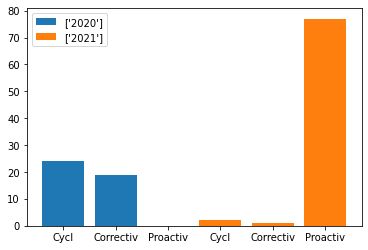

In [96]:
plt.figure()
maint_label=[ t.strip('Machine').strip('Maintenance') for t in maint_type]

plt.bar([1,2,3], height[:3], width=0.8, align='center', tick_label=['Cyclic','Corrective','Proactive' ],label=['2020'])
plt.bar([4,5,6], height[3:], width=0.8, align='center', label=['2021'])
plt.legend()
plt.xticks([1,2,3,4,5,6],[t for t in maint_label]*2)
plt.show()

## Cost of Maintenance Interventions

In [105]:
corrective_cost = 10000
regular_maintenance_cost =1000

In [106]:
cost=[m * regular_maintenance_cost for m in height]
cost[1]=cost[1]*corrective_cost/regular_maintenance_cost
cost[4]=cost[4]*corrective_cost/regular_maintenance_cost

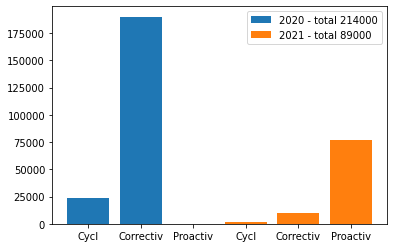

In [107]:
plt.figure()
maint_label=[ t.strip('Machine').strip('Maintenance') for t in maint_type]

plt.bar([1,2,3], cost[:3], width=0.8, align='center', tick_label=['Cyclic','Corrective','Proactive' ],label='2020 - total '+str(int(np.sum(cost[:3]))))
plt.bar([4,5,6], cost[3:], width=0.8, align='center',label='2021 - total '+str(int(np.sum(cost[3:]))))
plt.legend()
plt.xticks([1,2,3,4,5,6],[t for t in maint_label]*2)
plt.show()

## Cost of Maintenance per Product